<a href="https://colab.research.google.com/github/guilhermelaviola/IntegratingPracticesInDataScienceForBusiness/blob/main/Class10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis**
A time series is a sequence of data points indexed (or listed or graphed) in time order. These data points are typically recorded at regular intervals, like daily, monthly, or yearly. Analyzing time series data is useful for understanding past trends, predicting future values, and identifying patterns

In [4]:
# Importing all the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
# Configuring Google Colab to display %matplotlib graphs inline
# Generating dummy data
# Creating a 24-month time series with sales ranging from 80,000 to 120,000 units:
dates = pd.date_range(start='2023-01-01', periods=24, freq='M')
sales = np.random.randint(80, 120, size=(24,))

# Creating the DataFrame with the data above:
data = pd.DataFrame({'Date': dates, 'Sales': sales})

/tmp/ipython-input-10-3120953114.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2023-01-01', periods=24, freq='M')


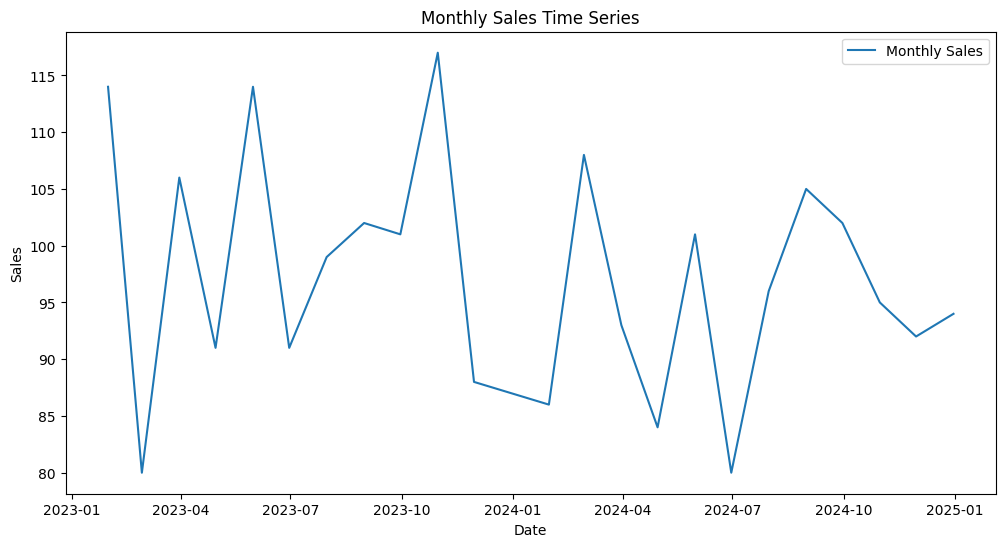

In [11]:
# Initial setup and plotting:
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Sales'], label='Monthly Sales')
plt.title('Monthly Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

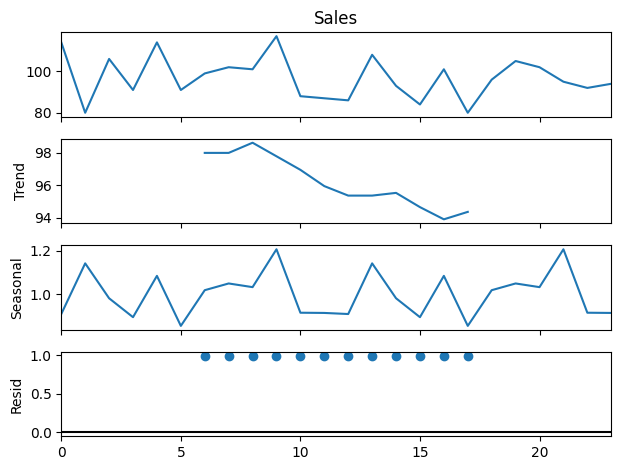

In [12]:
# Decomposing the time series:
result = seasonal_decompose(data['Sales'], model='multiplicative', period=12)

# Plotting the components
result.plot()
plt.show()

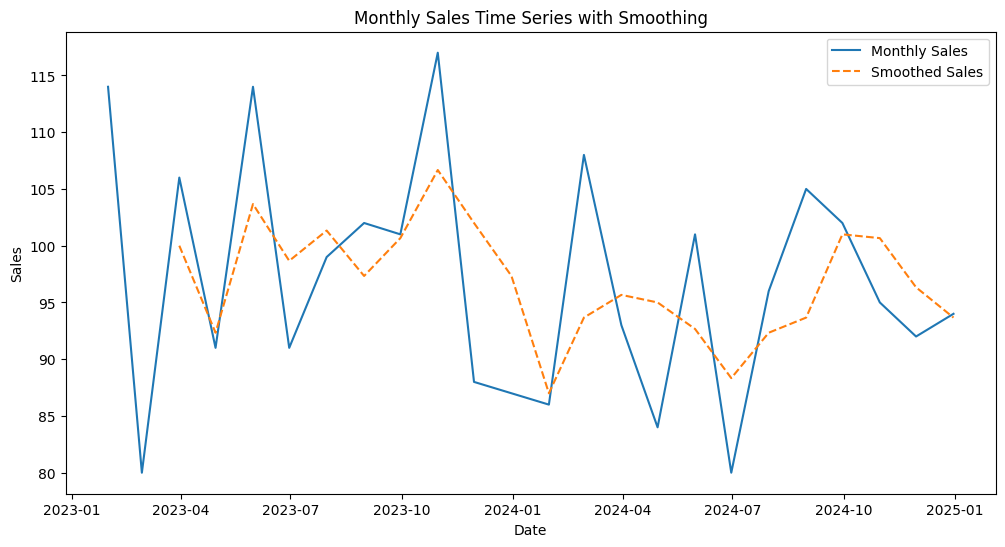

In [13]:
# Applying a moving average to smooth the time series:
data['Smoothed_Sales'] = data['Sales'].rolling(window=3).mean()

# Plotting the original and smoothed time series
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Sales'], label='Monthly Sales')
plt.plot(data['Date'], data['Smoothed_Sales'], label='Smoothed Sales', linestyle='--')
plt.title('Monthly Sales Time Series with Smoothing')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

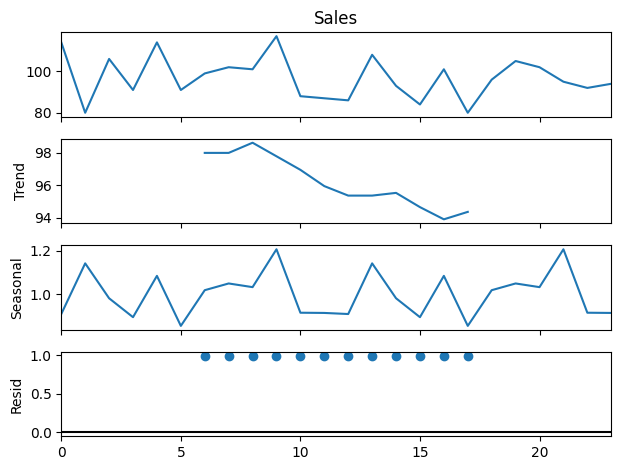

In [14]:
# Decomposing the time series:
result = seasonal_decompose(data['Sales'], model='multiplicative', period=12)

# Plotting the components:
result.plot()
plt.show()

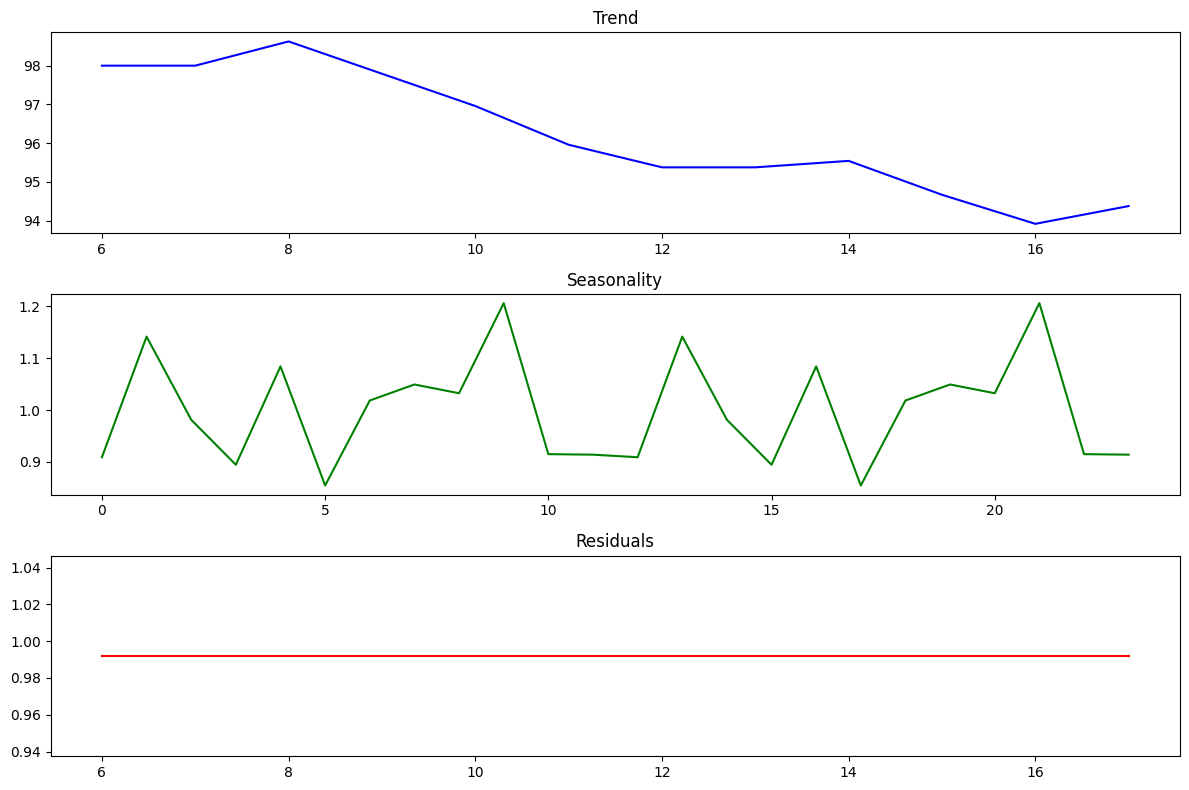

In [15]:
# Subplots and Visualization:
plt.figure(figsize=(12, 8))

# Trend:
plt.subplot(3, 1, 1)
plt.plot(result.trend, label='Trend', color='blue')
plt.title('Trend')

# Seasonality:
plt.subplot(3, 1, 2)
plt.plot(result.seasonal, label='Seasonality', color='green')
plt.title('Seasonality')

# Residuals:
plt.subplot(3, 1, 3)
plt.plot(result.resid, label='Residuals', color='red')
plt.title('Residuals')

plt.tight_layout()
plt.show()